In [21]:
import numpy as np #sayısal ifadeler
import pandas as pd # veriseti işlemleri
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import LabelEncoder #metin veya kategorik veriyi sayısal veriye dönüştürme
from sklearn.model_selection import train_test_split #veriyi farklı bölümlere ayırma
from sklearn.preprocessing import StandardScaler #veriyi ortalama bir değere  çeker +1/-1
from pandas.plotting import scatter_matrix
#--model oluşturma--
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#---model değerlendirmesi---
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [22]:
veriseti=pd.read_csv("D:\Okul\GİTHUB\lung cancer detection project\survey lung cancer.csv",sep=",") #verisetini okuma

In [23]:
print(veriseti) #verisetini yazdırma

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [24]:
veriseti.shape #boyut öğrenme

(309, 16)

In [25]:
#veriseti set stili
#1 no 2 yes
#m erkek f kadın

In [26]:
veriseti.isnull().values.any() #eksik kısım kontrolü


False

In [27]:
veriseti.duplicated().sum()

33

In [28]:
veriseti.drop_duplicates(inplace=True)

In [29]:
veriseti.shape

(276, 16)

In [30]:
veriseti.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [31]:
for categorical_column in veriseti:
    if categorical_column == 'AGE': # Skip the 'AGE' column as it is continuous numerical attribute
        continue
    veriseti[categorical_column]=LabelEncoder().fit_transform(veriseti[categorical_column])

veriseti.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


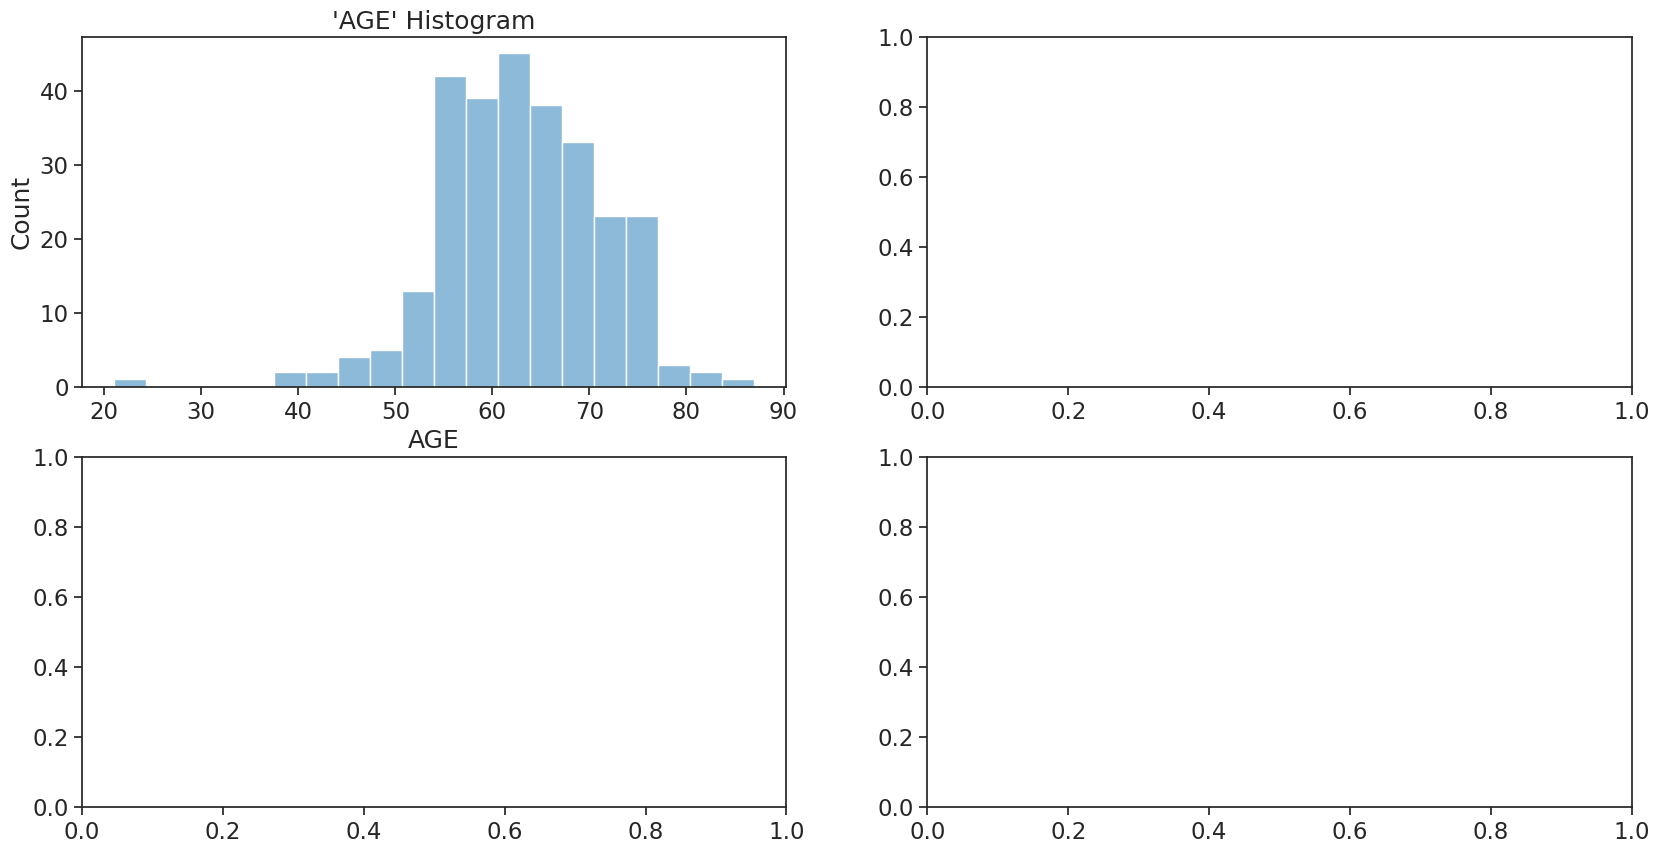

In [32]:
with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    # Set up the canvas for the figure
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    # Plotting just 'AGE'
    sns.histplot(data=veriseti, x='AGE', ax=axs[0, 0], alpha=0.5, stat='count')
    axs[0, 0].set_title("'AGE' Histogram")
plt.show()

GENDER                      Axes(0.125,0.11;0.0407895x0.77)
AGE                      Axes(0.173947,0.11;0.0407895x0.77)
SMOKING                  Axes(0.222895,0.11;0.0407895x0.77)
YELLOW_FINGERS           Axes(0.271842,0.11;0.0407895x0.77)
ANXIETY                  Axes(0.320789,0.11;0.0407895x0.77)
PEER_PRESSURE            Axes(0.369737,0.11;0.0407895x0.77)
CHRONIC DISEASE          Axes(0.418684,0.11;0.0407895x0.77)
FATIGUE                  Axes(0.467632,0.11;0.0407895x0.77)
ALLERGY                  Axes(0.516579,0.11;0.0407895x0.77)
WHEEZING                 Axes(0.565526,0.11;0.0407895x0.77)
ALCOHOL CONSUMING        Axes(0.614474,0.11;0.0407895x0.77)
COUGHING                 Axes(0.663421,0.11;0.0407895x0.77)
SHORTNESS OF BREATH      Axes(0.712368,0.11;0.0407895x0.77)
SWALLOWING DIFFICULTY    Axes(0.761316,0.11;0.0407895x0.77)
CHEST PAIN               Axes(0.810263,0.11;0.0407895x0.77)
LUNG_CANCER              Axes(0.859211,0.11;0.0407895x0.77)
dtype: object

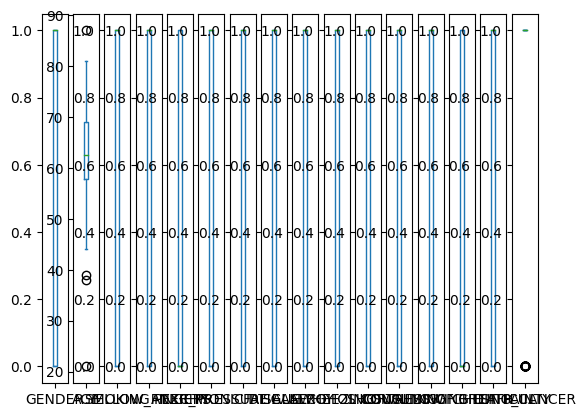

In [33]:
#kutugrafiği
veriseti.plot(kind="box",subplots=True,sharex=False,sharey=False)

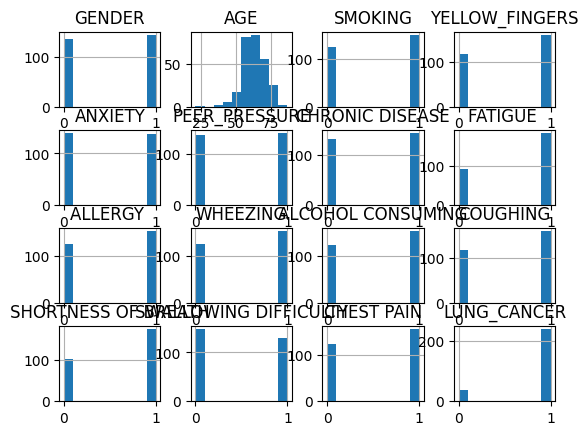

In [34]:
#histogram
veriseti.hist()
plt.show()

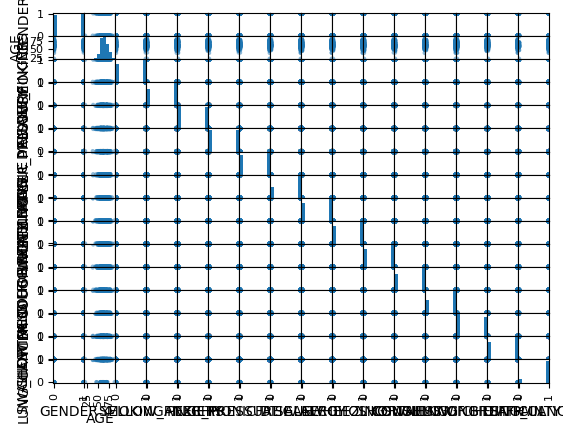

In [35]:
#scatter plot matrix
scatter_matrix(veriseti)
plt.show()

In [36]:
X = veriseti.drop('LUNG_CANCER', axis=1)
y = veriseti['LUNG_CANCER']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(
X,y,random_state=42,stratify=y)
print(f"Train shape : {X_train.shape}\nTest shape: {X_test.shape}")

Train shape : (207, 15)
Test shape: (69, 15)


In [38]:
X_train_resamp, y_train_resamp = RandomOverSampler().fit_resample(X_train, y_train)
X_test_resamp, y_test_resamp = RandomOverSampler().fit_resample(X_test, y_test)
print(f'Train_resampled shape : {X_train_resamp.shape}\nTest_resampled shape: {X_test_resamp.shape}')

Train_resampled shape : (358, 15)
Test_resampled shape: (118, 15)


In [39]:
scaler = StandardScaler()
X_train_resamp['AGE']=scaler.fit_transform(X_train_resamp[['AGE']])
X_test_resamp['AGE']=scaler.transform(X_test_resamp[['AGE']])
X_train_resamp.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0.197890,1,1,1,1,1,0,0,0,1,0,0,1,1
1,0,0.055345,0,0,0,0,1,1,0,0,0,0,1,0,0
2,0,-0.372288,0,0,0,0,1,1,0,0,0,0,1,0,0
3,1,-1.655189,0,1,0,0,1,1,1,1,1,1,1,0,1
4,1,-0.372288,1,1,1,1,1,0,1,0,1,0,0,1,1


In [40]:
X,y=np.arange(10).reshape((5,2)),range(5)

In [41]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [42]:
y

range(0, 5)

In [43]:
list(y)

[0, 1, 2, 3, 4]

In [44]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
213,1,64,1,1,1,1,1,0,0,0,1,0,0,1,1
129,0,63,0,0,0,0,1,1,0,0,0,0,1,0,0
105,0,60,0,0,0,0,1,1,0,0,0,0,1,0,0
146,1,51,0,1,0,0,1,1,1,1,1,1,1,0,1
267,1,60,1,1,1,1,1,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,61,0,0,1,0,1,1,0,1,1,1,1,1,0
16,1,75,1,0,0,0,1,0,1,1,1,1,1,0,1
225,1,59,1,0,0,1,1,1,1,1,1,1,1,1,1
165,1,63,0,1,1,0,1,0,1,1,1,1,0,1,0


In [45]:
y_train


213    1
129    0
105    1
146    1
267    1
      ..
243    1
16     1
225    1
165    1
42     1
Name: LUNG_CANCER, Length: 207, dtype: int32

In [46]:
X_test

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
219,1,70,0,0,0,0,1,1,1,0,1,1,1,0,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
89,0,55,1,0,0,1,1,1,1,1,1,0,0,1,1
108,0,49,0,0,0,1,1,0,1,0,1,1,1,0,0
241,1,59,1,0,0,0,0,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0,57,0,1,1,0,0,0,0,0,0,1,0,0,0
98,1,64,0,1,1,1,0,1,1,0,0,1,0,1,0
184,1,72,1,0,0,0,0,1,1,1,1,1,1,0,1
30,0,57,1,1,0,0,0,0,0,0,0,0,1,0,0


In [47]:
y_test


219    1
1      1
89     1
108    1
241    1
      ..
171    0
98     1
184    1
30     0
277    0
Name: LUNG_CANCER, Length: 69, dtype: int32

In [48]:
#Lineer Regresyon
lineereg= LinearRegression()

In [49]:
lineereg.fit(X_train_resamp, y_train_resamp)
lineereg_skor=lineereg.score(X_train_resamp, y_train_resamp)
print(f"Lineer Regresyon Sınıflandırma: {lineereg_skor}")

Linear Regresyon Sınıflandırma: 0.6254666613748523
